# Memanggil Library yang Digunakan

In [1]:
#Memanggil modul untuk visualisasi dan dataframe
import pandas as pd, numpy as np, seaborn as sns, plotly.express as px, matplotlib.pyplot as plt,plotly.graph_objects as go, math

#Memanggil modul untuk praproses data
from sklearn.preprocessing import LabelEncoder
from scipy.stats import chi2_contingency
from scipy import stats
import scipy.stats as stats
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split

#Memanggil modul untuk pemodelan
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier

#Memanggil modul untuk hyperparameter tuning
from sklearn.model_selection import GridSearchCV

#Memanggil modul untuk evaluasi
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve
from sklearn.model_selection import learning_curve

# Pemahaman Data

In [2]:
#panggil dataset
employee_df = pd.read_excel('C:/Users/agivc/Documents/Serba Serbi KULIAH/SKRIPSI JAYA JAYA JAYA/Data_Cagiva Chaedar Bey Lirna/Data Historis Karyawan TOG Indonesia.xlsx')

In [3]:
employee_df.head(5)

,Usia,Jenis-Kelamin,Pendidikan Terakhir,Bidang_Pendidikan,Status Pernikahan,jml_tanggungan,Jarak_Rumah(Km),Gaji(Rp),Tunjangan(Rp),Posisi_Kerja,Jam_Kerja_Standar,Thn_Posisi,Lama_Bekerja,Awal_bekerja,Akhir_bekerja,Status
0,30.0,L,S1,Teknik Informatika,K0,0.0,3,11875000,1700000.0,.Net Developer,8,2023,5,2018-11-12,NaT,Aktif
1,29.0,L,S1,Teknik Informatika,TK0,0.0,15,9000000,1200000.0,Software Quality Assurance,8,2023,2,2021-02-01,NaT,Aktif
2,26.0,L,S1,Teknik Informatika,TK0,0.0,17,8000000,1200000.0,Software Quality Assurance,8,2023,2,2021-08-25,NaT,Aktif
3,32.0,L,S1,Teknik Informatika,TK0,0.0,8,8000000,2200000.0,Software Quality Assurance,8,2023,2,2021-10-11,NaT,Aktif
4,28.0,L,S1,Matematika,TK0,0.0,35,11500000,1200000.0,.Net Developer,8,2023,2,2021-11-01,NaT,Aktif


In [4]:
employee_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 409 entries, 0 to 408
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Usia                 402 non-null    float64       
 1   Jenis-Kelamin        409 non-null    object        
 2   Pendidikan Terakhir  382 non-null    object        
 3   Bidang_Pendidikan    381 non-null    object        
 4   Status Pernikahan    395 non-null    object        
 5   jml_tanggungan       395 non-null    float64       
 6   Jarak_Rumah(Km)      378 non-null    object        
 7   Gaji(Rp)             409 non-null    int64         
 8   Tunjangan(Rp)        247 non-null    float64       
 9   Posisi_Kerja         409 non-null    object        
 10  Jam_Kerja_Standar    409 non-null    int64         
 11  Thn_Posisi           409 non-null    int64         
 12  Lama_Bekerja         409 non-null    int64         
 13  Awal_bekerja         409 non-null  

In [5]:
employee_df['Jarak_Rumah(Km)'] = pd.to_numeric(employee_df['Jarak_Rumah(Km)'], errors='coerce').astype('float64')
# employee_df['jml_tanggungan'] = pd.to_numeric(employee_df['jml_tanggungan'], errors='coerce').astype('Int64')

In [6]:
employee_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 409 entries, 0 to 408
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Usia                 402 non-null    float64       
 1   Jenis-Kelamin        409 non-null    object        
 2   Pendidikan Terakhir  382 non-null    object        
 3   Bidang_Pendidikan    381 non-null    object        
 4   Status Pernikahan    395 non-null    object        
 5   jml_tanggungan       395 non-null    float64       
 6   Jarak_Rumah(Km)      375 non-null    float64       
 7   Gaji(Rp)             409 non-null    int64         
 8   Tunjangan(Rp)        247 non-null    float64       
 9   Posisi_Kerja         409 non-null    object        
 10  Jam_Kerja_Standar    409 non-null    int64         
 11  Thn_Posisi           409 non-null    int64         
 12  Lama_Bekerja         409 non-null    int64         
 13  Awal_bekerja         409 non-null  

# Analisis dan Eksplorasi Data (EDA)

In [7]:
## Memeriksa nilai nan yang ada pada masing - masing variabel

#membuat list variabel yang memiliki nilai null (Nan)
features_with_na=[features for features in employee_df.columns if employee_df[features].isnull().sum()>1]

for feature in features_with_na:
    print(feature, '=', np.round(employee_df[feature].isnull().mean(), 4)*100)

Usia = 1.71
Pendidikan Terakhir = 6.6000000000000005
Bidang_Pendidikan = 6.8500000000000005
Status Pernikahan = 3.42
jml_tanggungan = 3.42
Jarak_Rumah(Km) = 8.309999999999999
Tunjangan(Rp) = 39.61
Akhir_bekerja = 41.32


## Menangani Nilai Null Berdasarkan Variabel Numerik dan Variabel Kategorik

### Variabel Numerik

In [8]:
# Memilih kolom dengan tipe data numerik
variabel_numerik = employee_df.select_dtypes(include=['int64', 'float64'])

# Membuat DataFrame baru untuk menyimpan informasi variabel numerik
info_variabel_numerik = pd.DataFrame({
    'Tipe Data': variabel_numerik.dtypes,
    'Rata-rata': variabel_numerik.mean(),
    'Standar Deviasi': variabel_numerik.std(),
    'Minimum': variabel_numerik.min(),
    'Maksimum': variabel_numerik.max(),
    'Jumlah Missing Values': variabel_numerik.isnull().sum(),
})

# Menampilkan informasi variabel numerik
print(info_variabel_numerik)


                  Tipe Data     Rata-rata  Standar Deviasi    Minimum  \
Usia                float64  3.018159e+01     5.458011e+00       21.0   
jml_tanggungan      float64  7.265823e-01     9.670601e-01        0.0   
Jarak_Rumah(Km)     float64  2.016773e+01     1.370744e+01        0.0   
Gaji(Rp)              int64  7.799645e+06     4.204570e+06   150000.0   
Tunjangan(Rp)       float64  1.261134e+06     2.043916e+05  1100000.0   
Jam_Kerja_Standar     int64  7.958435e+00     1.998369e-01        7.0   
Thn_Posisi            int64  2.021257e+03     1.602727e+00     2018.0   
Lama_Bekerja          int64  8.704156e-01     1.118179e+00        0.0   

                     Maksimum  Jumlah Missing Values  
Usia                     55.0                      7  
jml_tanggungan            3.0                     14  
Jarak_Rumah(Km)          56.0                     34  
Gaji(Rp)           28300000.0                      0  
Tunjangan(Rp)       2500000.0                    162  
Jam_Kerja_St

In [9]:
variabel_numerik.describe()

,Usia,jml_tanggungan,Jarak_Rumah(Km),Gaji(Rp),Tunjangan(Rp),Jam_Kerja_Standar,Thn_Posisi,Lama_Bekerja
count,402.000000,395.000000,375.000000,4.090000e+02,2.470000e+02,409.000000,409.000000,409.000000
mean,30.181592,0.726582,20.167733,7.799645e+06,1.261134e+06,7.958435,2021.256724,0.870416
std,5.458011,0.967060,13.707440,4.204570e+06,2.043916e+05,0.199837,1.602727,1.118179
min,21.000000,0.000000,0.000000,1.500000e+05,1.100000e+06,7.000000,2018.000000,0.000000
25%,26.000000,0.000000,10.000000,5.500000e+06,1.200000e+06,8.000000,2020.000000,0.000000
50%,29.000000,0.000000,18.000000,7.200000e+06,1.200000e+06,8.000000,2021.000000,0.000000
75%,33.000000,2.000000,29.050000,9.000000e+06,1.200000e+06,8.000000,2023.000000,2.000000
max,55.000000,3.000000,56.000000,2.830000e+07,2.500000e+06,8.000000,2023.000000,5.000000


In [10]:
## Now lets check for numerical variables the contains missing values
numerical_with_nan=[feature for feature in employee_df.columns if employee_df[feature].isnull().sum()>1 and employee_df[feature].dtypes!='O']

## We will print the numerical nan variables and percentage of missing values

for feature in numerical_with_nan:
    print("{}: {}% missing value".format(feature,np.around(employee_df[feature].isnull().mean(),4)*100))

Usia: 1.71% missing value
jml_tanggungan: 3.42% missing value
Jarak_Rumah(Km): 8.309999999999999% missing value
Tunjangan(Rp): 39.61% missing value
Akhir_bekerja: 41.32% missing value


<Figure size 720x432 with 0 Axes>

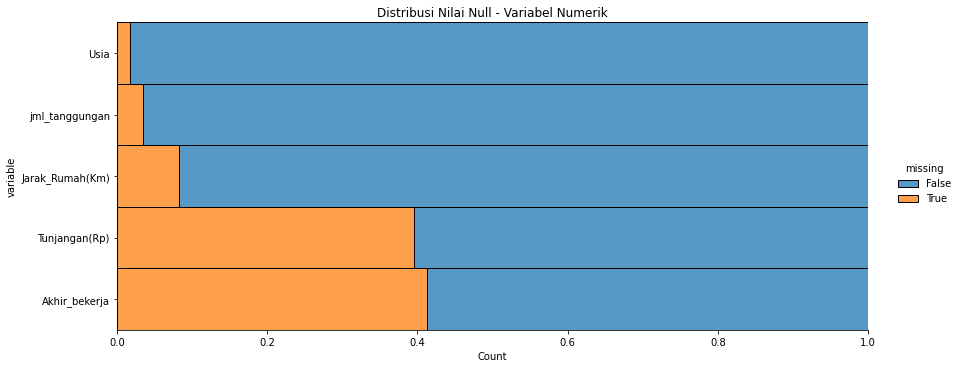

In [11]:
plt.figure(figsize=(10, 6))
sns.displot(
    data=employee_df[numerical_with_nan].isna().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    aspect=2.5
)
plt.title('Distribusi Nilai Null - Variabel Numerik')
plt.show()

### Menangani missing value pada variabel numerik

#### Usia

In [12]:
usia_null = employee_df[pd.isnull(employee_df['Usia'])]
usia_null

,Usia,Jenis-Kelamin,Pendidikan Terakhir,Bidang_Pendidikan,Status Pernikahan,jml_tanggungan,Jarak_Rumah(Km),Gaji(Rp),Tunjangan(Rp),Posisi_Kerja,Jam_Kerja_Standar,Thn_Posisi,Lama_Bekerja,Awal_bekerja,Akhir_bekerja,Status
120,NaN,L,S1,Teknik Informatika,NaN,NaN,22.8,3800000,1200000.0,UAT Tester,8,2023,0,2023-10-09,NaT,Aktif
121,NaN,L,S1,Sistem Informasi,NaN,NaN,41.9,3800000,1200000.0,UAT Tester,8,2023,0,2023-10-09,NaT,Aktif
182,NaN,L,S1,Teknik Informatika,NaN,NaN,10.0,18800000,NaN,System Analyst,8,2019,0,2019-12-19,2020-12-18,Atrisi
207,NaN,L,NaN,NaN,NaN,NaN,NaN,10000000,1200000.0,Android Developer,8,2020,0,2020-03-20,2021-01-08,Atrisi
244,NaN,L,S1,Teknik Informatika,NaN,NaN,18.0,8250000,1200000.0,Software Quality Assurance,8,2020,0,2020-02-04,2020-11-21,Atrisi
253,NaN,L,NaN,NaN,NaN,NaN,NaN,7950000,1100000.0,Oracle Database,8,2018,0,2018-09-21,2019-06-03,Atrisi
288,NaN,L,NaN,NaN,NaN,NaN,NaN,7000000,1200000.0,Database Administrator,8,2019,0,2019-04-01,2019-07-29,Atrisi


In [13]:
employee_df = employee_df.dropna(subset=['Usia'])

In [14]:
employee_df['Usia'].isnull().sum()

0

#### jml_tanggungan

In [15]:
tanggungan_null = employee_df[pd.isnull(employee_df['jml_tanggungan'])]
tanggungan_null

,Usia,Jenis-Kelamin,Pendidikan Terakhir,Bidang_Pendidikan,Status Pernikahan,jml_tanggungan,Jarak_Rumah(Km),Gaji(Rp),Tunjangan(Rp),Posisi_Kerja,Jam_Kerja_Standar,Thn_Posisi,Lama_Bekerja,Awal_bekerja,Akhir_bekerja,Status
123,23.0,L,S1,Ilmu Komputer,NaN,NaN,4.0,3800000,1200000.0,UAT Tester,8,2023,0,2023-10-09,NaT,Aktif
124,24.0,P,S1,Sistem Informasi,NaN,NaN,33.0,3800000,1200000.0,UAT Tester,8,2023,0,2023-10-09,NaT,Aktif
214,33.0,L,NaN,NaN,NaN,NaN,NaN,9200000,1200000.0,.Net Developer,8,2019,0,2019-05-06,2019-08-23,Atrisi
218,30.0,L,NaN,NaN,NaN,NaN,NaN,9000000,1200000.0,.Net Developer,8,2019,0,2019-11-18,2019-12-04,Atrisi
243,33.0,P,S1,Ilmu Komputer,NaN,NaN,7.0,8250000,1200000.0,Business Analyst,8,2020,0,2020-08-10,2021-05-17,Atrisi
280,29.0,L,NaN,NaN,NaN,NaN,NaN,7300000,1200000.0,Golang Developer,8,2021,0,2021-12-01,2022-06-01,Atrisi
356,26.0,L,S1,Teknik Informatika,NaN,NaN,18.0,5160000,NaN,Junior Java Developer,8,2019,0,2019-11-12,2020-01-12,Atrisi


In [16]:
median_tanggungan_per_usia = employee_df.groupby('Usia')['jml_tanggungan'].median()
employee_df['jml_tanggungan'].fillna(employee_df['Usia'].map(median_tanggungan_per_usia), inplace=True)

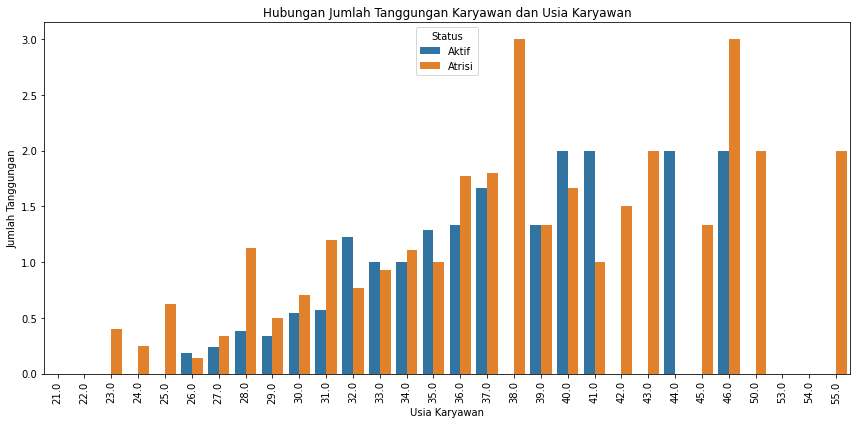

In [17]:
# Mengatur ukuran gambar
plt.figure(figsize=(12, 6))

# Membuat bar plot
sns.barplot(data=employee_df, x='Usia', y='jml_tanggungan', hue='Status', errorbar=None)

# Menambahkan label dan judul
plt.xlabel('Usia Karyawan')
plt.ylabel('Jumlah Tanggungan')
plt.title('Hubungan Jumlah Tanggungan Karyawan dan Usia Karyawan')

# Menampilkan visualisasi
plt.xticks(rotation=90)
plt.tight_layout()
# plt.savefig('distribusi_jml_tanggungan_usia_status_barplot.png')
plt.show()


In [18]:
employee_df['jml_tanggungan'].isnull().sum()

0

In [19]:
employee_df['jml_tanggungan'].describe()

count    402.000000
mean       0.718905
std        0.962173
min        0.000000
25%        0.000000
50%        0.000000
75%        2.000000
max        3.000000
Name: jml_tanggungan, dtype: float64

#### Tunjangan(Rp)

In [20]:
tunjangan_null = employee_df[pd.isnull(employee_df['Tunjangan(Rp)'])]
tunjangan_null

,Usia,Jenis-Kelamin,Pendidikan Terakhir,Bidang_Pendidikan,Status Pernikahan,jml_tanggungan,Jarak_Rumah(Km),Gaji(Rp),Tunjangan(Rp),Posisi_Kerja,Jam_Kerja_Standar,Thn_Posisi,Lama_Bekerja,Awal_bekerja,Akhir_bekerja,Status
25,31.0,L,S1,Teknik Informatika,TK0,0.0,15.0,11750000,NaN,.Net Dev,8,2023,2,2021-02-02,NaT,Aktif
30,54.0,P,S1,Ekonomi,TK0,0.0,17.0,15000000,NaN,Business Analyst,8,2023,1,2022-01-10,NaT,Aktif
34,30.0,L,S1,Teknik Informatika,K0,0.0,23.0,8100000,NaN,.NET Developer.,8,2023,1,2022-10-03,NaT,Aktif
38,40.0,L,S1,Teknik Informatika,K2,2.0,26.0,28200000,NaN,Sr Business Analyst,8,2023,1,2022-10-28,NaT,Aktif
40,23.0,P,S1,Teknik Komputer,TK0,0.0,11.0,6900000,NaN,Project Management Officer,8,2023,0,2022-12-27,NaT,Aktif
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
404,25.0,L,S1,Kewirausahaan,TK0,0.0,33.0,3100000,NaN,Digital Business Development,8,2019,2,2019-10-21,2022-03-01,Atrisi
405,26.0,P,S1,Ekonomi Pembangunan,K1,1.0,22.9,3000000,NaN,Digital Marketing,8,2019,2,2019-12-27,2022-12-17,Atrisi
406,24.0,L,D3,Teknik Informatika,TK0,0.0,46.0,2600000,NaN,Techincal Support,7,2020,2,2020-05-26,2022-09-25,Atrisi
407,25.0,L,S1,Teknik Mesin,K2,2.0,39.1,2550000,NaN,IT Support,8,2018,1,2020-01-17,2021-08-13,Atrisi


In [21]:
# Menghitung median tunjangan untuk setiap kategori "Posisi_Kerja"
mean_tunjangan_per_posisi = employee_df.groupby('Thn_Posisi')['Tunjangan(Rp)'].mean()

# Mengisi nilai null pada variabel "Tunjangan(Rp)" dengan median tunjangan untuk setiap kategori "Posisi_Kerja"
employee_df['Tunjangan(Rp)'].fillna(employee_df['Thn_Posisi'].map(mean_tunjangan_per_posisi), inplace=True)

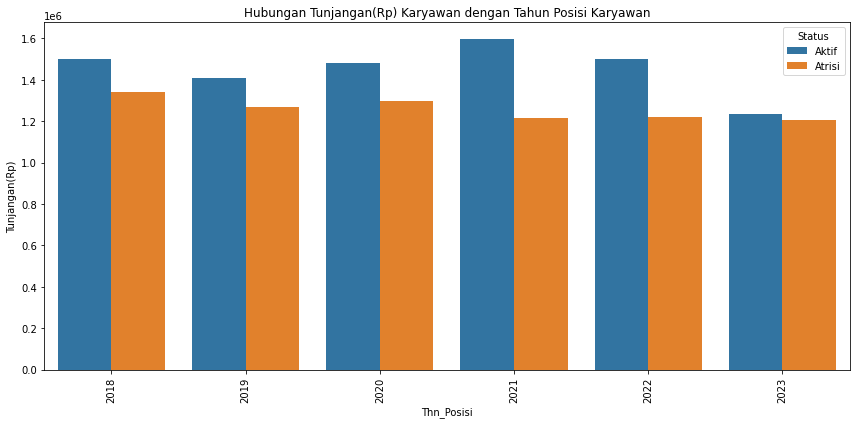

In [22]:
# Mengatur ukuran gambar
plt.figure(figsize=(12, 6))

# Membuat bar plot
sns.barplot(data=employee_df, x='Thn_Posisi', y='Tunjangan(Rp)', hue='Status', errorbar=None)

# Menambahkan label dan judul
plt.xlabel('Thn_Posisi')
plt.ylabel('Tunjangan(Rp)')
plt.title('Hubungan Tunjangan(Rp) Karyawan dengan Tahun Posisi Karyawan')

# Menampilkan visualisasi
plt.xticks(rotation=90)
plt.tight_layout()
# plt.savefig('distribusi_jml_tanggungan_usia_status_barplot.png')
plt.show()


In [23]:
employee_df['Tunjangan(Rp)'].isnull().sum()

0

#### Jarak Rumah

In [24]:
jr_null = employee_df[pd.isnull(employee_df["Jarak_Rumah(Km)"])]
jr_null

,Usia,Jenis-Kelamin,Pendidikan Terakhir,Bidang_Pendidikan,Status Pernikahan,jml_tanggungan,Jarak_Rumah(Km),Gaji(Rp),Tunjangan(Rp),Posisi_Kerja,Jam_Kerja_Standar,Thn_Posisi,Lama_Bekerja,Awal_bekerja,Akhir_bekerja,Status
14,24.0,L,S1,Teknik Informatika,TK0,0.0,NaN,6500000,1.200000e+06,Software Quality Assurance,8,2023,0,2022-11-21,NaT,Aktif
17,26.0,L,S1,Sistem Informasi,TK0,0.0,NaN,6800000,1.200000e+06,Software Quality Assurance,8,2023,0,2023-01-04,NaT,Aktif
44,30.0,P,S1,Teknik Informatika,TK0,0.0,NaN,8600000,1.200000e+06,IT Project Support,8,2023,0,2023-02-22,NaT,Aktif
119,24.0,L,S1,NaN,TK0,0.0,NaN,150000,1.231250e+06,Staff Handling Process,8,2023,0,2023-10-02,NaT,Aktif
158,34.0,L,S1,Matematika,TK0,0.0,NaN,11800000,1.500000e+06,System Analyst,8,2019,5,2018-12-16,NaT,Aktif
159,29.0,L,S1,Matematika,TK1,1.0,NaN,11000000,1.200000e+06,Data Scientist,8,2021,2,2021-07-01,NaT,Aktif
203,31.0,L,NaN,NaN,K1,1.0,NaN,10600000,1.200000e+06,.Net Developer,8,2022,0,2022-03-04,2022-08-26,Atrisi
212,30.0,P,NaN,NaN,TK0,0.0,NaN,9300000,1.200000e+06,VB6 Developer,8,2019,0,2019-01-02,2019-07-28,Atrisi
214,33.0,L,NaN,NaN,NaN,1.0,NaN,9200000,1.200000e+06,.Net Developer,8,2019,0,2019-05-06,2019-08-23,Atrisi
215,33.0,L,NaN,NaN,K0,0.0,NaN,9200000,1.271429e+06,IT Network and Security,8,2021,0,2021-11-01,2022-08-26,Atrisi


In [25]:
employee_df["Jarak_Rumah(Km)"].describe()

count    371.000000
mean      20.135310
std       13.723587
min        0.000000
25%       10.000000
50%       18.000000
75%       29.050000
max       56.000000
Name: Jarak_Rumah(Km), dtype: float64

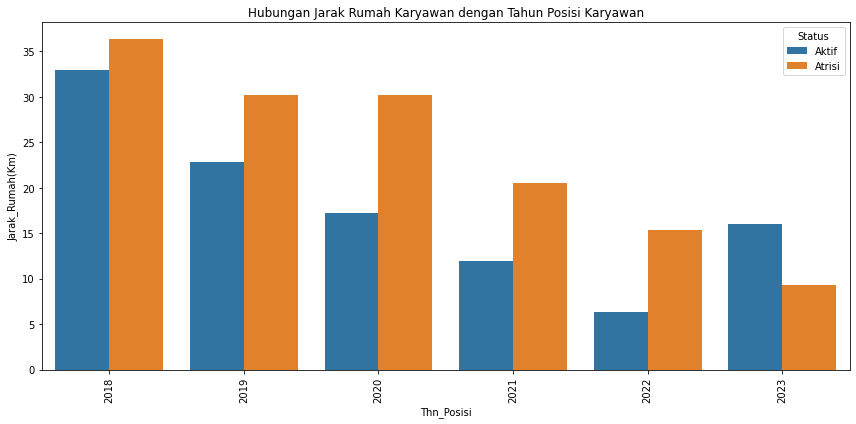

In [26]:
# Mengatur ukuran gambar
plt.figure(figsize=(12, 6))

# Membuat bar plot
sns.barplot(data=employee_df, x='Thn_Posisi', y='Jarak_Rumah(Km)', hue='Status', errorbar=None)

# Menambahkan label dan judul
plt.xlabel('Thn_Posisi')
plt.ylabel('Jarak_Rumah(Km)')
plt.title('Hubungan Jarak Rumah Karyawan dengan Tahun Posisi Karyawan')

# Menampilkan visualisasi
plt.xticks(rotation=90)
plt.tight_layout()
# plt.savefig('distribusi_jml_tanggungan_usia_status_barplot.png')
plt.show()


In [27]:
median_jarak_per_thn = employee_df.groupby('Thn_Posisi')['Jarak_Rumah(Km)'].median()
employee_df['Jarak_Rumah(Km)'].fillna(employee_df['Thn_Posisi'].map(median_jarak_per_thn), inplace=True)


In [28]:
employee_df["Jarak_Rumah(Km)"].isnull().sum()


0

#### Akhir_Bekerja

In [29]:
akhirkerja_null = employee_df[pd.isnull(employee_df["Akhir_bekerja"])]
akhirkerja_null

,Usia,Jenis-Kelamin,Pendidikan Terakhir,Bidang_Pendidikan,Status Pernikahan,jml_tanggungan,Jarak_Rumah(Km),Gaji(Rp),Tunjangan(Rp),Posisi_Kerja,Jam_Kerja_Standar,Thn_Posisi,Lama_Bekerja,Awal_bekerja,Akhir_bekerja,Status
0,30.0,L,S1,Teknik Informatika,K0,0.0,3.0,11875000,1700000.0,.Net Developer,8,2023,5,2018-11-12,NaT,Aktif
1,29.0,L,S1,Teknik Informatika,TK0,0.0,15.0,9000000,1200000.0,Software Quality Assurance,8,2023,2,2021-02-01,NaT,Aktif
2,26.0,L,S1,Teknik Informatika,TK0,0.0,17.0,8000000,1200000.0,Software Quality Assurance,8,2023,2,2021-08-25,NaT,Aktif
3,32.0,L,S1,Teknik Informatika,TK0,0.0,8.0,8000000,2200000.0,Software Quality Assurance,8,2023,2,2021-10-11,NaT,Aktif
4,28.0,L,S1,Matematika,TK0,0.0,35.0,11500000,1200000.0,.Net Developer,8,2023,2,2021-11-01,NaT,Aktif
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164,27.0,L,S1,Teknik Komputer,K2,2.0,14.0,650000,1200000.0,PHP Developer,8,2021,2,2021-10-13,NaT,Aktif
165,27.0,L,S1,Manajemen Bisnis,K2,2.0,15.0,5100000,1200000.0,IT Admin,8,2019,4,2019-11-28,NaT,Aktif
166,26.0,P,D4,Digital Marketing,TK0,0.0,12.5,11000000,1700000.0,Business Analyst,8,2021,2,2021-08-09,NaT,Aktif
167,30.0,P,S1,Statistika,K1,1.0,10.0,11200000,1700000.0,Data Scientist,8,2022,1,2022-07-07,NaT,Aktif


In [30]:
# Menghapus kolom 'Awal_bekerja' dan 'Akhir_bekerja'
employee_df.drop(['Awal_bekerja', 'Akhir_bekerja'], axis=1, inplace=True)

In [31]:
employee_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 402 entries, 0 to 408
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Usia                 402 non-null    float64
 1   Jenis-Kelamin        402 non-null    object 
 2   Pendidikan Terakhir  378 non-null    object 
 3   Bidang_Pendidikan    377 non-null    object 
 4   Status Pernikahan    395 non-null    object 
 5   jml_tanggungan       402 non-null    float64
 6   Jarak_Rumah(Km)      402 non-null    float64
 7   Gaji(Rp)             402 non-null    int64  
 8   Tunjangan(Rp)        402 non-null    float64
 9   Posisi_Kerja         402 non-null    object 
 10  Jam_Kerja_Standar    402 non-null    int64  
 11  Thn_Posisi           402 non-null    int64  
 12  Lama_Bekerja         402 non-null    int64  
 13  Status               402 non-null    object 
dtypes: float64(4), int64(4), object(6)
memory usage: 47.1+ KB


### Variabel Kategorik

In [32]:
# Memilih kolom dengan tipe data kategorik
variabel_kategorik = employee_df.select_dtypes(include=['object'])

# Membuat DataFrame baru untuk menyimpan informasi variabel kategorik
info_variabel_kategorik = pd.DataFrame({
    'Tipe Data': variabel_kategorik.dtypes,
    'Jumlah Unique Values': variabel_kategorik.nunique(),
    'Jumlah Missing Values': variabel_kategorik.isnull().sum(),
})

# Menampilkan informasi variabel kategorik
print(info_variabel_kategorik)

                    Tipe Data  Jumlah Unique Values  Jumlah Missing Values
Jenis-Kelamin          object                     2                      0
Pendidikan Terakhir    object                     6                     24
Bidang_Pendidikan      object                    66                     25
Status Pernikahan      object                     8                      7
Posisi_Kerja           object                   122                      0
Status                 object                     2                      0


In [33]:
variabel_kategorik.describe()

,Jenis-Kelamin,Pendidikan Terakhir,Bidang_Pendidikan,Status Pernikahan,Posisi_Kerja,Status
count,402,378,377,395,402,402
unique,2,6,66,8,122,2
top,L,S1,Teknik Informatika,TK0,Software Quality Assurance,Atrisi
freq,273,302,121,212,60,235


### Memeriksa nilai null untuk variabel kategorik

In [34]:
categorical_with_nan = [feature for feature in employee_df.columns if employee_df[feature].isnull().sum() > 1 and employee_df[feature].dtypes == 'O']

# Mencetak variabel kategorik yang memiliki nilai null dan persentase nilai null
for feature in categorical_with_nan:
    percentage_missing = np.around(employee_df[feature].isnull().mean() * 100, decimals=2)
    print(f"{feature}: {percentage_missing}% missing value")


Pendidikan Terakhir: 5.97% missing value
Bidang_Pendidikan: 6.22% missing value
Status Pernikahan: 1.74% missing value


<Figure size 720x432 with 0 Axes>

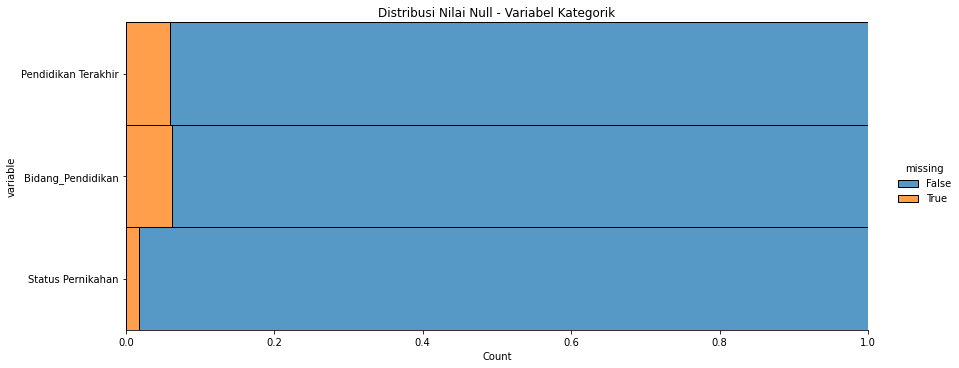

In [35]:
plt.figure(figsize=(10, 6))
sns.displot(
    data=employee_df[categorical_with_nan].isna().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    aspect=2.5
)
plt.title('Distribusi Nilai Null - Variabel Kategorik')
plt.show()

#### Pendidikan_Terakhir

In [36]:
pt_null = employee_df[pd.isnull(employee_df["Pendidikan Terakhir"])]
pt_null

,Usia,Jenis-Kelamin,Pendidikan Terakhir,Bidang_Pendidikan,Status Pernikahan,jml_tanggungan,Jarak_Rumah(Km),Gaji(Rp),Tunjangan(Rp),Posisi_Kerja,Jam_Kerja_Standar,Thn_Posisi,Lama_Bekerja,Status
203,31.0,L,NaN,NaN,K1,1.0,11.5,10600000,1.200000e+06,.Net Developer,8,2022,0,Atrisi
212,30.0,P,NaN,NaN,TK0,0.0,25.5,9300000,1.200000e+06,VB6 Developer,8,2019,0,Atrisi
214,33.0,L,NaN,NaN,NaN,1.0,25.5,9200000,1.200000e+06,.Net Developer,8,2019,0,Atrisi
215,33.0,L,NaN,NaN,K0,0.0,18.0,9200000,1.271429e+06,IT Network and Security,8,2021,0,Atrisi
218,30.0,L,NaN,NaN,NaN,0.0,25.5,9000000,1.200000e+06,.Net Developer,8,2019,0,Atrisi
220,29.0,L,NaN,NaN,TK0,0.0,18.0,8900000,1.200000e+06,DevOps Engineer,8,2021,0,Atrisi
221,33.0,L,NaN,NaN,K0,0.0,36.0,8800000,1.200000e+06,Software Quality Assurance,8,2018,0,Atrisi
225,29.0,P,NaN,NaN,TK0,0.0,18.0,8800000,1.200000e+06,UI/UX Designer,8,2021,0,Atrisi
239,26.0,L,NaN,NaN,TK0,0.0,11.5,8400000,1.200000e+06,Software Quality Assurance,8,2022,0,Atrisi
250,30.0,P,NaN,NaN,TK0,0.0,28.0,8000000,1.200000e+06,Software Quality Assurance,8,2020,0,Atrisi


In [37]:
employee_df['Pendidikan Terakhir'].fillna('Tidak Diketahui', inplace=True)


In [38]:
employee_df['Pendidikan Terakhir'].isnull().sum()

0

In [39]:
employee_df['Pendidikan Terakhir'].describe()

count     402
unique      7
top        S1
freq      302
Name: Pendidikan Terakhir, dtype: object

#### Bidang_Pendidikan


In [40]:
bidpend_null = employee_df[pd.isnull(employee_df["Bidang_Pendidikan"])]
bidpend_null

,Usia,Jenis-Kelamin,Pendidikan Terakhir,Bidang_Pendidikan,Status Pernikahan,jml_tanggungan,Jarak_Rumah(Km),Gaji(Rp),Tunjangan(Rp),Posisi_Kerja,Jam_Kerja_Standar,Thn_Posisi,Lama_Bekerja,Status
119,24.0,L,S1,NaN,TK0,0.0,13.0,150000,1.231250e+06,Staff Handling Process,8,2023,0,Aktif
203,31.0,L,Tidak Diketahui,NaN,K1,1.0,11.5,10600000,1.200000e+06,.Net Developer,8,2022,0,Atrisi
212,30.0,P,Tidak Diketahui,NaN,TK0,0.0,25.5,9300000,1.200000e+06,VB6 Developer,8,2019,0,Atrisi
214,33.0,L,Tidak Diketahui,NaN,NaN,1.0,25.5,9200000,1.200000e+06,.Net Developer,8,2019,0,Atrisi
215,33.0,L,Tidak Diketahui,NaN,K0,0.0,18.0,9200000,1.271429e+06,IT Network and Security,8,2021,0,Atrisi
218,30.0,L,Tidak Diketahui,NaN,NaN,0.0,25.5,9000000,1.200000e+06,.Net Developer,8,2019,0,Atrisi
220,29.0,L,Tidak Diketahui,NaN,TK0,0.0,18.0,8900000,1.200000e+06,DevOps Engineer,8,2021,0,Atrisi
221,33.0,L,Tidak Diketahui,NaN,K0,0.0,36.0,8800000,1.200000e+06,Software Quality Assurance,8,2018,0,Atrisi
225,29.0,P,Tidak Diketahui,NaN,TK0,0.0,18.0,8800000,1.200000e+06,UI/UX Designer,8,2021,0,Atrisi
239,26.0,L,Tidak Diketahui,NaN,TK0,0.0,11.5,8400000,1.200000e+06,Software Quality Assurance,8,2022,0,Atrisi


In [41]:
# Menghitung modus dari kolom "Bidang_Pendidikan" untuk setiap kelompok "Posisi_Kerja"
modus_per_posisi = employee_df.groupby('Posisi_Kerja')['Bidang_Pendidikan'].apply(lambda x: x.mode()[0])

# Mengganti nilai null pada kolom "Bidang_Pendidikan" dengan modus berdasarkan kelompok "Posisi_Kerja"
for posisi, modus in modus_per_posisi.items():
    employee_df.loc[(employee_df['Posisi_Kerja'] == posisi) & (employee_df['Bidang_Pendidikan'].isnull()), 'Bidang_Pendidikan'] = modus

In [42]:
employee_df['Bidang_Pendidikan'].isnull().sum()

0

In [43]:
employee_df['Bidang_Pendidikan'].describe()


count                    402
unique                    66
top       Teknik Informatika
freq                     140
Name: Bidang_Pendidikan, dtype: object

#### Status Pernikahan

In [44]:
nikah_null = employee_df[pd.isnull(employee_df["Status Pernikahan"])]
nikah_null

,Usia,Jenis-Kelamin,Pendidikan Terakhir,Bidang_Pendidikan,Status Pernikahan,jml_tanggungan,Jarak_Rumah(Km),Gaji(Rp),Tunjangan(Rp),Posisi_Kerja,Jam_Kerja_Standar,Thn_Posisi,Lama_Bekerja,Status
123,23.0,L,S1,Ilmu Komputer,NaN,0.0,4.0,3800000,1.200000e+06,UAT Tester,8,2023,0,Aktif
124,24.0,P,S1,Sistem Informasi,NaN,0.0,33.0,3800000,1.200000e+06,UAT Tester,8,2023,0,Aktif
214,33.0,L,Tidak Diketahui,Teknik Informatika,NaN,1.0,25.5,9200000,1.200000e+06,.Net Developer,8,2019,0,Atrisi
218,30.0,L,Tidak Diketahui,Teknik Informatika,NaN,0.0,25.5,9000000,1.200000e+06,.Net Developer,8,2019,0,Atrisi
243,33.0,P,S1,Ilmu Komputer,NaN,1.0,7.0,8250000,1.200000e+06,Business Analyst,8,2020,0,Atrisi
280,29.0,L,Tidak Diketahui,Teknik Informatika,NaN,0.0,18.0,7300000,1.200000e+06,Golang Developer,8,2021,0,Atrisi
356,26.0,L,S1,Teknik Informatika,NaN,0.0,18.0,5160000,1.291667e+06,Junior Java Developer,8,2019,0,Atrisi


In [45]:
modus_per_usia = employee_df.groupby(pd.cut(employee_df['Usia'], bins=3))['Status Pernikahan'].apply(lambda x: x.mode()[0])

# Mengganti nilai null pada kolom "Status Pernikahan" dengan modus berdasarkan nilai usia
for usia_range, modus in modus_per_usia.items():
    employee_df.loc[(pd.cut(employee_df['Usia'], bins=3) == usia_range) & (employee_df['Status Pernikahan'].isnull()), 'Status Pernikahan'] = modus

In [46]:
employee_df['Status Pernikahan'].isnull().sum()

0

In [47]:
employee_df['Status Pernikahan'].describe()

count     402
unique      8
top       TK0
freq      217
Name: Status Pernikahan, dtype: object

In [48]:
modus_per_usia

Usia
(20.966, 32.333]    TK0
(32.333, 43.667]     K2
(43.667, 55.0]       K2
Name: Status Pernikahan, dtype: object

In [49]:
employee_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 402 entries, 0 to 408
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Usia                 402 non-null    float64
 1   Jenis-Kelamin        402 non-null    object 
 2   Pendidikan Terakhir  402 non-null    object 
 3   Bidang_Pendidikan    402 non-null    object 
 4   Status Pernikahan    402 non-null    object 
 5   jml_tanggungan       402 non-null    float64
 6   Jarak_Rumah(Km)      402 non-null    float64
 7   Gaji(Rp)             402 non-null    int64  
 8   Tunjangan(Rp)        402 non-null    float64
 9   Posisi_Kerja         402 non-null    object 
 10  Jam_Kerja_Standar    402 non-null    int64  
 11  Thn_Posisi           402 non-null    int64  
 12  Lama_Bekerja         402 non-null    int64  
 13  Status               402 non-null    object 
dtypes: float64(4), int64(4), object(6)
memory usage: 47.1+ KB


# Seleksi Fitur

In [50]:
# Analisis Korelasi untuk Variabel Numerik (Usia, Jarak Rumah(Km), Gaji(Rp), Tunjangan(Rp), Jam Kerja Standar, Thn Posisi, Lama Bekerja)
correlation_numerik = employee_df[['Usia', 'Jarak_Rumah(Km)', 'Gaji(Rp)', 'Tunjangan(Rp)', 'Jam_Kerja_Standar', 'Thn_Posisi', 'Lama_Bekerja']].corrwith(employee_df['Status'].map({'Aktif': 0, 'Atrisi': 1}))

# Analisis Korelasi untuk Variabel Kategorikal (Jenis Kelamin, Pendidikan Terakhir, Bidang Pendidikan, Status Pernikahan, Posisi Kerja)
# Menggunakan uji Chi-square untuk variabel kategorikal
crosstab_jk = pd.crosstab(employee_df['Jenis-Kelamin'], employee_df['Status'])
crosstab_pt = pd.crosstab(employee_df['Pendidikan Terakhir'], employee_df['Status'])
crosstab_bp = pd.crosstab(employee_df['Bidang_Pendidikan'], employee_df['Status'])
crosstab_sp = pd.crosstab(employee_df['Status Pernikahan'], employee_df['Status'])
crosstab_pk = pd.crosstab(employee_df['Posisi_Kerja'], employee_df['Status'])

# Melakukan uji Chi-square
chi2_jk, p_jk, _, _ = stats.chi2_contingency(crosstab_jk)
chi2_pt, p_pt, _, _ = stats.chi2_contingency(crosstab_pt)
chi2_bp, p_bp, _, _ = stats.chi2_contingency(crosstab_bp)
chi2_sp, p_sp, _, _ = stats.chi2_contingency(crosstab_sp)
chi2_pk, p_pk, _, _ = stats.chi2_contingency(crosstab_pk)

# Menampilkan hasil analisis
print("\nKorelasi untuk Variabel Numerik:")
print(correlation_numerik)
print("\nHasil Uji Chi-square untuk Variabel Kategorikal:")
print("Jenis Kelamin - Chi-square:", chi2_jk, "p-value:", p_jk)
print("Pendidikan Terakhir - Chi-square:", chi2_pt, "p-value:", p_pt)
print("Bidang Pendidikan - Chi-square:", chi2_bp, "p-value:", p_bp)
print("Status Pernikahan - Chi-square:", chi2_sp, "p-value:", p_sp)
print("Posisi Kerja - Chi-square:", chi2_pk, "p-value:", p_pk)


Korelasi untuk Variabel Numerik:
Usia                 0.063270
Jarak_Rumah(Km)      0.291358
Gaji(Rp)            -0.158852
Tunjangan(Rp)       -0.153045
Jam_Kerja_Standar    0.073689
Thn_Posisi          -0.578313
Lama_Bekerja        -0.153661
dtype: float64

Hasil Uji Chi-square untuk Variabel Kategorikal:
Jenis Kelamin - Chi-square: 0.0558004348432396 p-value: 0.8132610633835069
Pendidikan Terakhir - Chi-square: 30.983079449105173 p-value: 2.553854258067904e-05
Bidang Pendidikan - Chi-square: 78.76945708766303 p-value: 0.11719409440780636
Status Pernikahan - Chi-square: 17.294065856413077 p-value: 0.01559528935202975
Posisi Kerja - Chi-square: 193.68359202599956 p-value: 3.0224698765440862e-05


# Preprocessing

In [51]:
# Membuat objek LabelEncoder
label_encoder = LabelEncoder()

employee_df['Status'] = label_encoder.fit_transform(employee_df['Status'])


In [52]:
data2 = employee_df[['Jarak_Rumah(Km)', 'Gaji(Rp)', 'Tunjangan(Rp)', 'Thn_Posisi', 'Lama_Bekerja', 'Pendidikan Terakhir', 'Status Pernikahan', 'Posisi_Kerja', 'Status']]

In [61]:
data2

,Jarak_Rumah(Km),Gaji(Rp),Tunjangan(Rp),Thn_Posisi,Lama_Bekerja,Pendidikan Terakhir,Status Pernikahan,Posisi_Kerja,Status
0,3.0,11875000,1.700000e+06,2023,5,S1,K0,.Net Developer,0
1,15.0,9000000,1.200000e+06,2023,2,S1,TK0,Software Quality Assurance,0
2,17.0,8000000,1.200000e+06,2023,2,S1,TK0,Software Quality Assurance,0
3,8.0,8000000,2.200000e+06,2023,2,S1,TK0,Software Quality Assurance,0
4,35.0,11500000,1.200000e+06,2023,2,S1,TK0,.Net Developer,0
...,...,...,...,...,...,...,...,...,...
404,33.0,3100000,1.291667e+06,2019,2,S1,TK0,Digital Business Development,1
405,22.9,3000000,1.291667e+06,2019,2,S1,K1,Digital Marketing,1
406,46.0,2600000,1.339130e+06,2020,2,D3,TK0,Techincal Support,1
407,39.1,2550000,1.350000e+06,2018,1,S1,K2,IT Support,1


In [62]:
# Path untuk menyimpan file Excel
file_path = 'C:/Users/agivc/Documents/Serba Serbi KULIAH/SKRIPSI JAYA JAYA JAYA/Data_Cagiva Chaedar Bey Lirna/data_employee.xlsx'


# Simpan DataFrame menjadi file Excel
data2.to_excel(file_path, index=False)